In [405]:
import numpy as np

In [344]:
N = 10000
x = range(-N, N)
fx = []
b=47

In [345]:
b

47

In [346]:
n = 3

In [347]:
for i in x:
    fx.append(1-((b**n)*(i**2)))

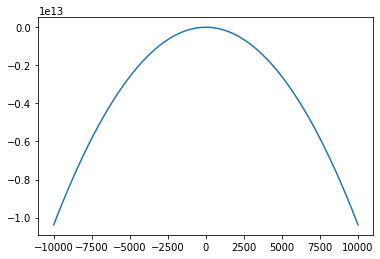

In [348]:
import matplotlib.pyplot as plt
plt.plot(x, fx)

In [450]:
def proj(y):
    return max(min(100, y), -10000)

In [350]:
x= list(x)

In [351]:
len(fx)

20000

In [352]:
import random
import time

# AGD

In [471]:
zk = 1
yk = 1
beta = 1000000000000000000000000
       
y = []
y = list(range(0,15))
k = 0
start = time.time()
while sum(abs(yk - np.array(y[-10:-1]) )) > 1e-3:
    tauk = 2/(k+2)
    etak = (k+1)/(2*beta)
    wk = (1-tauk)*yk + tauk*zk
   
    y.append(yk)
    grad = [2*( fx[r]-1+((wk**n)*(x[r])**2) )*(n*(wk**(n-1))*(x[r])**2)  for r in range(N)] #*(0*2*wk*(x[r])**2)
   
    
    yk = proj( wk-(1/beta)*( sum(grad) )/N )
    zk = proj( zk-(etak)*( sum(grad)   )/N )
    k = k+1
    print(sum(grad), yk)
    
end = time.time()
print(end-start, k)

-1.246175486764394e+25 1.0012461754867643
-1.2482469213446614e+25 1.0020790305791876
-1.2511031253106472e+25 1.0032262857472678
-1.2547512092378791e+25 1.0046897183986756
-1.2592000571441637e+25 1.006471509579984
-1.2644603675014047e+25 1.0085742506143553
-1.2705447023439213e+25 1.0110009509172437
-1.2774675448328877e+25 1.0137550470304084
-1.2852453656994526e+25 1.01684041292084
-1.2938966990564674e+25 1.020261371597874
-1.3034422281412907e+25 1.0240227081088693
-1.313904881630788e+25 1.028129683981409
-1.3253099412556445e+25 1.0325880531881146
-1.3376851615347736e+25 1.0374040797189303
-1.351060902553296e+25 1.0425845568551755
-1.3654702768221924e+25 1.0481368282499317
-1.3809493113818626e+25 1.0540688109304537
-1.3975371264523683e+25 1.0603890203504307
-1.4152761320869632e+25 1.0671065976331755
-1.4342122444586084e+25 1.074231339161316
-1.4543951236013532e+25 1.0817737286844726
-1.4758784346436831e+25 1.0897449721338783
-1.498720134813511e+25 1.098157035352145
-1.5229827887642837e+2

-4.095883656582994e+23 46.99980785384457
-2.4346138217479616e+23 46.99988578819613
-6.595652124229376e+22 46.999969058935456
8.976294915690292e+22 47.00004210868147
2.0056508154334095e+23 47.0000940865911
2.555080121428921e+23 47.00011986044365
2.554646883241108e+23 47.00011984012039
2.1075416198437878e+23 47.00009886632112
1.37567027275823e+23 47.00006453390829
5.403558376664209e+22 47.000025348663215
-2.3298233692905854e+22 46.999989070515184
3.791473150253296 212


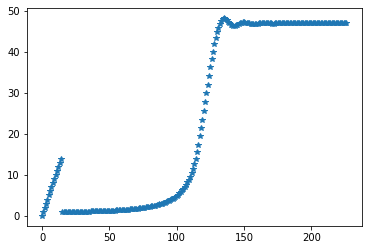

In [472]:
plt.plot(range(len(y)), y, '*')

# Stochastic AGD

In [469]:
zk = 1
yk = 10
beta = 1000000000000000000000
y = []
y = list(range(0,15))
k = 0
start = time.time()
while sum(abs(yk - np.array(y[-10:-1]) )) > 1e-3:    #(abs(yk-np.mean(y[-10:-1])) >= 1e-4):
    tauk = 2/(k+2)
    etak = (k+1)/(2*beta)
    wk = (1-tauk)*yk + tauk*zk
    
    y.append(yk)
    
    r = random.randint(0, N-1) 
    grad = 2*( fx[r]-1+((wk**n)*(x[r])**2) )*(n*(wk**(n-1))*(x[r])**2)
    
    yk = proj( wk-(1/beta)*( grad ) /N)
    zk = proj( zk-(etak)*( grad   ) /N)
    k = k+1
   
    print(grad, yk)

end = time.time()
print(end-start, k)

-3.221247171160965e+17 1.0000000322124718
-6.947866061188815e+20 1.000069500135593
-4.5854133348980965e+19 1.0000740828645553
-1.0199562453342275e+20 1.0000851984359267
-6.549193786825758e+20 1.000154548232405
-1.4308173689205588e+19 1.0001862515137805
-7.014041809901044e+17 1.000205957352887
-1.4775928277334486e+21 1.0003668460683517
-2.760361855051551e+21 1.000740728426405
-4.292567001638491e+20 1.0010304743399592
-5.501196758918308e+21 1.001794326311849
-2.7476916754362454e+17 1.0023396153305353
-5.349058601987016e+21 1.003302960599922
-3.1118321419583427e+18 1.0040382876079657
-3.502519766713409e+19 1.004639223872817
-4.219789392800632e+21 1.0055558854702236
-5.380044739580984e+17 1.006296380660772
-5.4798486578639495e+19 1.0069254325751316
-2.782005318221167e+16 1.0074598554919094
-4.974583031998749e+21 1.0084153904484423
-6.419880254041394e+16 1.0092180198624556
-4.1537100557098413e+21 1.0103313292097826
-1.306402023103165e+19 1.0112894741654845
-6.731470279149532e+20 1.012199904

8.287431361320763e+19 47.00824957085209
3.3823489113592656e+21 47.00456526658308
4.5726880690660224e+18 47.00089018316566
-3959199978496308.0 46.997224459827954
-3.8810312618333957e+21 46.9939561671564
-2.2125979594521936e+20 46.99071798078214
-6.371797436179976e+20 46.98755171935357
-4.69487266135538e+20 46.984440388941216
-8.253076921435007e+21 46.982162216637334
-2.2939792244069258e+21 46.98011851760152
-3.6926034422622795e+21 46.97844905924679
-4.001215193975971e+21 46.977183633975315
-3.12234167874884e+21 46.97623330399579
-2.942334915770141e+17 46.975285140439425
-1.1374758087040942e+22 46.97547684500569
-3.6929478810607354e+20 46.9757040398999
-4.689219566142863e+19 46.97593532072723
-1.7894495435265656e+22 46.97795546508157
-3.018661729930394e+21 46.980270895657
-8.060999048452008e+21 46.98338635565327
-5.5983006115324435e+17 46.98649337583348
-6.94521392569997e+20 46.989662054577266
-7.314468857202644e+20 46.99289587843705
-1.5473480345475568e+21 46.9962762779882
-1.4045097105

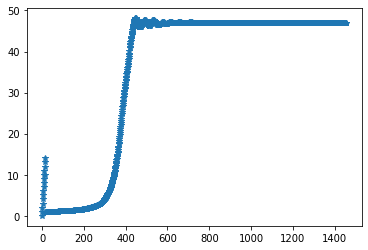

In [470]:
plt.plot(range(len(y)), y, '*')

In [438]:
sum(abs(0- np.array(y[-10:-1]) ))

81

In [430]:
y = list(range(0,15))

In [203]:
y

[3,
 -133337.0,
 11852814836.33333,
 -1580443958813692.0,
 2.528820965173102e+20,
 -4.495879104375458e+25,
 8.56395604388919e+30,
 -1.7128666786348553e+36,
 3.552769066071368e+41,
 -7.579575226680278e+46,
 1.6537985435404107e+52,
 -3.6752702683508205e+57,
 8.293284113207682e+62,
 -1.8956916187053377e+68,
 4.381347745024822e+73,
 -1.02235970212323e+79,
 2.4056586859682107e+84,
 -5.70255444183914e+89,
 1.3606697078336078e+95,
 -3.265751869945712e+100,
 7.879623218096794e+105,
 -1.9102962757902706e+111,
 4.6513621295062976e+116,
 -1.1370499891083913e+122,
 2.7896861993683015e+127,
 -6.867224058435423e+132,
 1.695685994182013e+138,
 -4.1990275301792734e+143,
 1.0425633692057562e+149,
 -2.5949393571412196e+154,
 6.473683944421968e+159,
 -1.618492702379761e+165,
 4.0545856305411323e+170,
 -1.0176665889106539e+176,
 2.5588179635291435e+181,
 -6.4447160428521745e+186,
 1.6257661900165476e+192,
 -4.107380838846823e+197,
 1.0391783052401687e+203,
 -2.6327017309963784e+208,
 6.678368701893712e+21